# Los Angeles, LAX Airport
NOAA GHCN Data: https://www.ncei.noaa.gov/cdo-web/datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
weather=pd.read_csv("LAX_40.csv")
weather['DATE']= pd.to_datetime(weather['DATE'])
weather.set_index(["DATE"],inplace=True)
weather = weather.loc['1993-01-01':'2023-09-23']

In [3]:
# The documention details the core weather variables. (These variables have the lowest null values.)
df = weather[["AWND","PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]]
df.apply(pd.isnull).sum()

AWND       4
PRCP       0
SNOW    9582
SNWD    8913
TMAX       0
TMIN       0
dtype: int64

# AWND

In [4]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).sum()
w = w[w!=0]

b = pd.cut(w, bins=[0, 1, 5, np.inf], labels=['0-1','2-5','6 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

          AWND  Number
0          0-1       1
1          2-5       1
2  6 and above       0


/var/folders/f3/567zc1c91t7dv2rxdqfm1zkxrcmrzx/T/ipykernel_56925/442758383.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = b.groupby(b).size().reset_index(name='Number')


In [5]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).cumsum() #cumsum for index location
w = w[w!=0]
w

DATE
1997-03-01    1
1997-03-02    2
1997-03-03    3
2023-09-23    1
Name: AWND, dtype: int64

In [6]:
filtered_df = df.loc['1997-02-28':'1997-03-04']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1997-02-28,14.32,0.0,0.0,0.0,65,48
1997-03-01,NaN,0.0,NaN,0.0,64,46
1997-03-02,NaN,0.0,NaN,0.0,60,45
1997-03-03,NaN,0.0,NaN,0.0,59,47
1997-03-04,6.71,0.0,NaN,0.0,65,47


In [7]:
df.loc[df['AWND'].isnull(),'AWND']=df['AWND'].interpolate()

In [8]:
filtered_df = df.loc['1997-02-28':'1997-03-04']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1997-02-28,14.3200,0.0,0.0,0.0,65,48
1997-03-01,12.4175,0.0,NaN,0.0,64,46
1997-03-02,10.5150,0.0,NaN,0.0,60,45
1997-03-03,8.6125,0.0,NaN,0.0,59,47
1997-03-04,6.7100,0.0,NaN,0.0,65,47


In [9]:
df.apply(pd.isnull).sum()

AWND       0
PRCP       0
SNOW    9582
SNWD    8913
TMAX       0
TMIN       0
dtype: int64

# SNOW

In [10]:
s = df.SNOW.isna().groupby(df.SNOW.notna().cumsum()).sum()
s = s[s!=0]

b = pd.cut(s, bins=[0, 1, 1000, np.inf], labels=['0-1','2-1000','1001 and above'])
out = b.groupby(b).size().reset_index(name='Cases')
print (out)

             SNOW  Cases
0             0-1      0
1          2-1000      1
2  1001 and above      3


/var/folders/f3/567zc1c91t7dv2rxdqfm1zkxrcmrzx/T/ipykernel_56925/2489429417.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = b.groupby(b).size().reset_index(name='Cases')


In [11]:
s = df.SNOW.isna().groupby(df.SNOW.notna().cumsum()).cumsum() #cumsum for index location
s = s[s!=0]
s

DATE
1997-03-01       1
1997-03-02       2
1997-03-03       3
1997-03-04       4
1997-03-05       5
              ... 
2023-09-19    1603
2023-09-20    1604
2023-09-21    1605
2023-09-22    1606
2023-09-23    1607
Name: SNOW, Length: 9582, dtype: int64

<Axes: xlabel='DATE'>

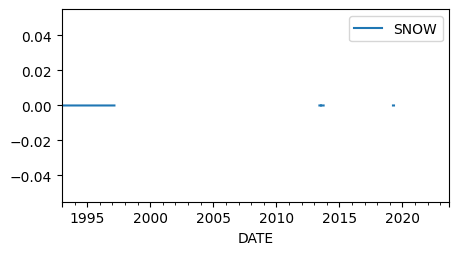

In [12]:
df.plot(y = ['SNOW'], figsize=(5,2.5))

<Axes: xlabel='DATE'>

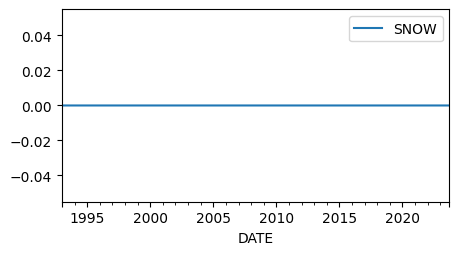

In [13]:
df.loc[df['SNOW'].isnull(),'SNOW']=df["SNOW"].fillna(0)
df.plot(y = ['SNOW'], figsize=(5,2.5))

In [14]:
df.apply(pd.isnull).sum()

AWND       0
PRCP       0
SNOW       0
SNWD    8913
TMAX       0
TMIN       0
dtype: int64

# SNWD

In [15]:
sd = df.SNWD.isna().groupby(df.SNWD.notna().cumsum()).sum()
sd = sd[sd!=0]

b = pd.cut(sd, bins=[0, 1, 1000, np.inf], labels=['0-1','2-1000','1001 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

             SNWD  Number
0             0-1       3
1          2-1000       1
2  1001 and above       3


/var/folders/f3/567zc1c91t7dv2rxdqfm1zkxrcmrzx/T/ipykernel_56925/3119578094.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = b.groupby(b).size().reset_index(name='Number')


In [16]:
sd = df.SNWD.isna().groupby(df.SNWD.notna().cumsum()).cumsum() #cumsum for index location
sd = sd[sd!=0]
sd

DATE
1998-12-25       1
1998-12-31       1
1999-02-01       1
1999-02-02       2
1999-02-03       3
              ... 
2023-09-19    1603
2023-09-20    1604
2023-09-21    1605
2023-09-22    1606
2023-09-23    1607
Name: SNWD, Length: 8913, dtype: int64

array([<Axes: xlabel='DATE'>], dtype=object)

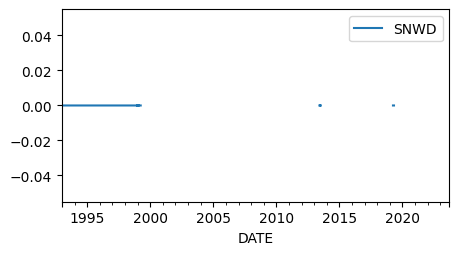

In [17]:
df.plot(y = ['SNWD'],subplots=True, figsize=(5,2.5))

<Axes: xlabel='DATE'>

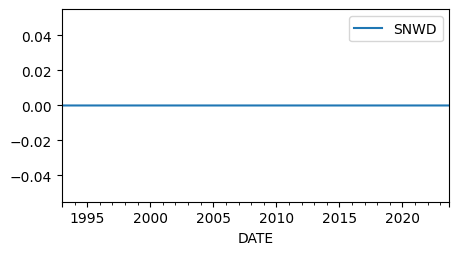

In [18]:
df.loc[df['SNWD'].isnull(),'SNWD']=df["SNWD"].fillna(0)
df.plot(y = ['SNWD'], figsize=(5,2.5))

In [19]:
df.apply(pd.isnull).sum()

AWND    0
PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64